### Objective:
##### To build a KNN classifier and neural network classifier to identify the numbers in the street view house numbers dataset

### Approach:
1. Imported the h5py data and convert into a numpy array
2. Flatten the data given to build a KNN classifier and neural network classifier

### KNN classifier:
1. The level of accuracy attained is c.46% for a k value of 3.
2. I was not able to find the optimal k value using a for loop due to computational capacity limitation of the my laptop.
3. Based on the classification report printed the precision for identify 7 and 9 are higher than the other numbers. 

### Neural network classifier:
1. I have build a base model classifier with relu as the activation function, cross entropy as the loss function and Stochastic gradient descent as the optimizer an attained an accuracy of c.10% and loss of c. 4.9
2. I have tried tuning the model by normalising the input variables and introducing a learning rate, decay, momentum and with an accelarated parameter value (nesterov) being set to true. It resulted in a signficant reduction in the loss value (by c.50%). However, the accuracy remained at c.10%
3. I have attempted to furture fine tune the model by introducing a for loop to find the ideal combination of learning rate and decay to further improve the accuracy. However, due to computational capacity limitation of my laptop I was not able to run the for loop to find the ideal combination of learning rate and decay. I expected to find the ideal combination of learning rate and decay which is expected to yield a better model that has an improved accuracy rate and a lower loss value.
4. Due to computational capacity limitation of my laptop I have also kept the number of layers to a minimum.

### KNN classifier vs Neural network classifier:

1. KNN requires relatively less training time and computational capacity as compared to neural network.
2. Also KNN is very simple and requires tuning only one hyperparameter (the value of k), while neural network training involves many hyperparameters controlling the size and structure of the network and the optimization procedure. 
3. However, the as neural networks are optimised using various hyper parameter tuning procedures they attain improved levels of accuracy than KNN classifier can ever achieve. KNN depends on the neighbors only. But a neural network uses weights and change / transfer the weights of each neuron with respect to the input. Though neural networks need a larger training phase they can be tuned to get more accuracy.
4. Also, once a neural network is trained, the training data is no longer needed to produce new predictions. This is not the case with KNN.
5. Once a neural network is trained on one task, its parameters can be used as a good initializer for another (similar) task. This is a form of transfer learning that cannot be achieved with KNN.

In [78]:
# Importing libraries required to import and visualise the data
import pandas as pd
import tensorflow as tf
import keras
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing libraries from sklearn to build the KNN classifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# Importing libraries from keras to build the neural network classifier
from keras.models import load_model
from keras.models import Sequential
from keras import optimizers
from keras.utils.np_utils import to_categorical

In [2]:
# Read H5 file
img_data = h5py.File('SVHN_single_grey1.h5', "r")

# Get and print list of datasets within the H5 file
datasetNames = [n for n in img_data.keys()]
for n in datasetNames:
    print(n)

X_test
X_train
X_val
y_test
y_train
y_val


In [3]:
# convert the data set into a numpy array
X_test = np.array(img_data['X_test'])
X_train = np.array(img_data['X_train'])
X_val = np.array(img_data['X_val'])
y_test = np.array(img_data['y_test'])
y_train = np.array(img_data['y_train'])
y_val = np.array(img_data['y_val'])

In [4]:
# print the value of X_test to visualise the independent variables in the dataset
print(X_test)

[[[ 40.558   46.7917  48.9764 ... 112.1153 112.9904 112.1646]
  [ 39.4379  44.2911  47.1768 ... 111.0122 110.9475 109.9368]
  [ 38.4488  43.6394  48.7098 ... 109.8921 109.9414 109.1048]
  ...
  [ 34.9869  35.4707  39.6676 ... 109.211  109.9074 112.7346]
  [ 35.6602  35.5462  40.3193 ... 110.9998 112.049  114.3431]
  [ 36.1871  35.4214  40.6998 ... 110.0169 111.2017 114.1906]]

 [[115.1609 114.161  113.1611 ... 112.0302 112.6711 112.7851]
  [110.5743 110.2754 108.9766 ... 106.1448 106.7857 107.0137]
  [102.8031 102.5042 101.7924 ...  95.776   95.531   95.645 ]
  ...
  [169.8457 170.6176 167.8028 ...  45.1708  55.6967  62.81  ]
  [157.7329 157.6189 153.8042 ...  42.9538  50.1811  56.1805]
  [150.3207 149.2068 144.8051 ...  42.1388  48.2522  53.2517]]

 [[133.255  134.7279 136.3148 ... 103.7248 100.8391 100.6111]
  [134.2549 135.8418 138.3146 ... 117.1965 114.1968 114.0828]
  [136.2547 135.9558 137.4287 ... 126.8535 123.7398 123.4409]
  ...
  [135.4136 133.4847 131.2569 ... 129.0552 131.6

In [5]:
# print the shape of dataset to understand the composition of the dataset
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(60000, 32, 32)
(60000,)
(18000, 32, 32)
(18000,)


##### Ignoring val data set. Using only training and testing data set for training and testing the neural network

In [15]:
# Understand the number and nature of categories the data set is to be classified into
np.unique(y_test, axis = 0)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

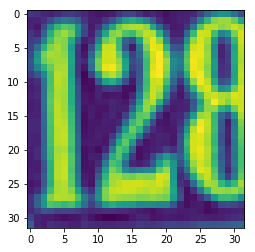

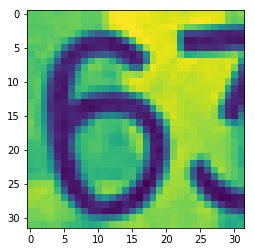

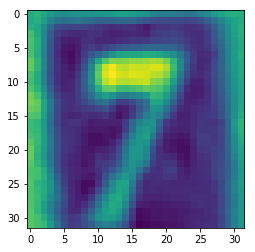

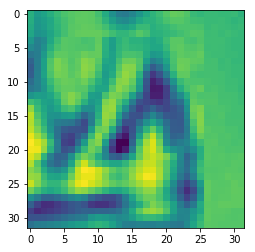

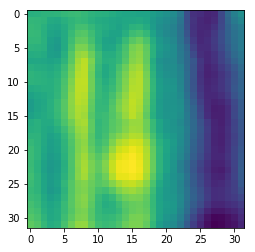

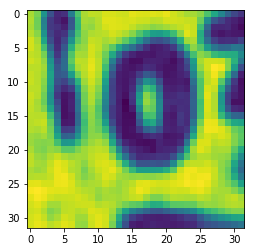

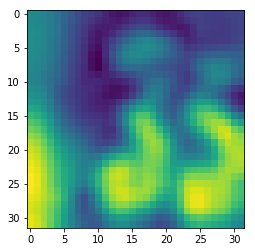

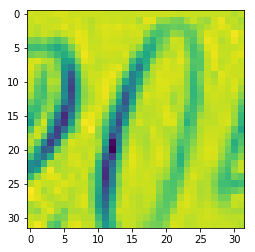

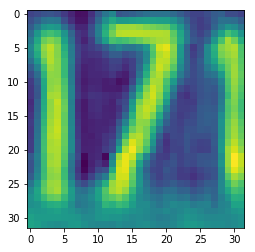

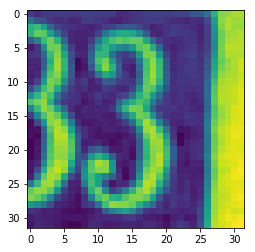

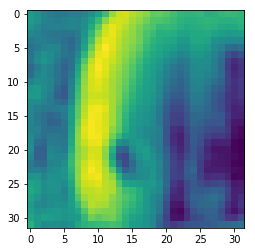

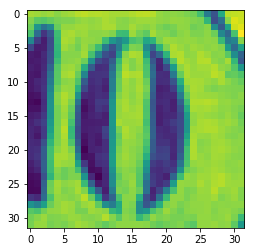

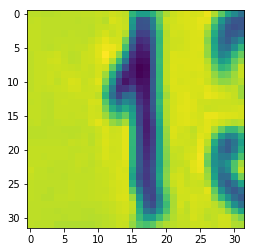

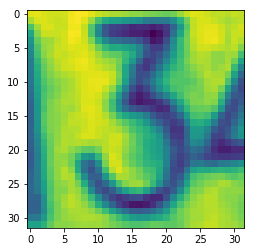

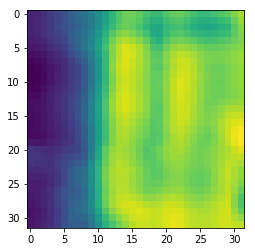

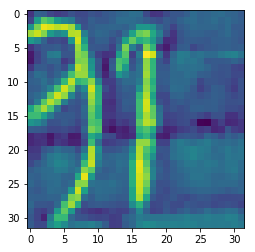

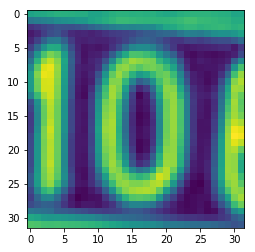

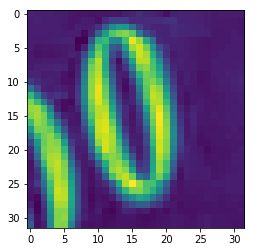

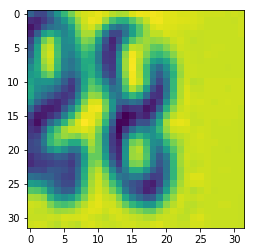

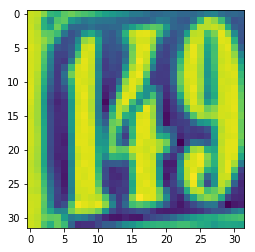

In [16]:
# visualize the image output of the input variables to understand the quality and complexity of the input data
for i in range(20):
    image = X_train[i]
    plt.figure(i)
    plt.imshow(image)

### Creating a K nearest neighbor classifier to classify the street view house numbers data set

In [8]:
# reshaping X data: (n, 32, 32) => (n, 1024); 3 dimensional data into 2 dimensional data
X_train_data = X_train.reshape((X_train.shape[0], -1))
X_test_data = X_test.reshape((X_test.shape[0], -1))

In [ ]:
# building a KNN - Neighbors based classification model with iterations for different hyper parameters to determine the best
# n_neighbors value
k_value = list(range(1,30,2))

from sklearn.metrics import accuracy_score

ac_scores = []

for k in k_value:
    model_KNN = KNeighborsClassifier(n_neighbors = k)
    model_KNN.fit(X_train_data, y_train)
    KNN_y_predict = model_KNN.predict(X_test_data)
    scores = accuracy_score(y_test, KNN_y_predict)
    ac_scores.append(scores)
    
optimal_k = k_value[ac_scores.index(max(ac_scores))]
print("The optimal k_value is %d" % optimal_k)

##### Due to computational capacity limitation of my laptop I was not able to run the above code to find the ideal k value (number of neighbors used to predict the value of the variable) . Accordingly I am using an arbitory value of 3 to run the code.

In [7]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)

In [10]:
# fitting the model
knn.fit(X_train_data, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [11]:
# predict the response
y_pred = knn.predict(X_test_data)

In [13]:
# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.4617777777777778


In [80]:
#printing the classification report
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.34      0.68      0.46      1814
           1       0.40      0.71      0.52      1828
           2       0.49      0.54      0.51      1803
           3       0.35      0.38      0.36      1719
           4       0.60      0.56      0.58      1812
           5       0.45      0.32      0.37      1768
           6       0.48      0.31      0.38      1832
           7       0.78      0.55      0.64      1808
           8       0.45      0.25      0.32      1812
           9       0.60      0.32      0.41      1804

   micro avg       0.46      0.46      0.46     18000
   macro avg       0.49      0.46      0.46     18000
weighted avg       0.50      0.46      0.46     18000



##### As found in the classification report above the KNN classifier has achieved an accuracy value of c.46%. However, it can be noted that the accuracy value is higher for 7 and 9 as compared to the other numbers. This can be attributed to the distinctive look of these numbers over the other numbers.

### Building a neural network to classify the street view house numbers data set

In [63]:
# Convert both training and testing labels into one-hot vectors
y_train_data = keras.utils.to_categorical(y_train,num_classes=10)
y_test_data = keras.utils.to_categorical(y_test,num_classes=10)

In [64]:
#Initialize sequenial model
model = keras.models.Sequential()

In [65]:
#Reshape data from 2D to 1D ->32*32 to 1024
model.add(keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [66]:
#Add Dense layer which provides 10 outputs after applying softmax
model.add(keras.layers.Dense(10,activation = 'relu'))

In [67]:
#compile the model
model.compile(optimizer= 'sgd', loss='categorical_crossentropy',  metrics = ['accuracy'])

In [68]:
# fit model
model.fit(X_train,y_train_data,epochs=10,validation_data=(X_test,y_test_data), verbose = 2, batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 1s - loss: 4.9621 - accuracy: 0.0990 - val_loss: 4.8971 - val_accuracy: 0.1000
Epoch 2/10
 - 1s - loss: 4.8841 - accuracy: 0.1030 - val_loss: 4.8962 - val_accuracy: 0.1013
Epoch 3/10
 - 1s - loss: 4.8834 - accuracy: 0.1009 - val_loss: 4.8958 - val_accuracy: 0.0996
Epoch 4/10
 - 1s - loss: 4.8829 - accuracy: 0.1021 - val_loss: 4.8955 - val_accuracy: 0.1037
Epoch 5/10
 - 1s - loss: 4.8824 - accuracy: 0.1048 - val_loss: 4.8950 - val_accuracy: 0.1046
Epoch 6/10
 - 1s - loss: 4.8820 - accuracy: 0.1035 - val_loss: 4.8943 - val_accuracy: 0.1012
Epoch 7/10
 - 1s - loss: 4.8816 - accuracy: 0.1040 - val_loss: 4.8940 - val_accuracy: 0.1057
Epoch 8/10
 - 1s - loss: 4.8811 - accuracy: 0.1059 - val_loss: 4.8938 - val_accuracy: 0.1128
Epoch 9/10
 - 1s - loss: 4.8806 - accuracy: 0.1094 - val_loss: 4.8933 - val_accuracy: 0.1046
Epoch 10/10
 - 1s - loss: 4.8802 - accuracy: 0.1104 - val_loss: 4.8930 - val_accuracy: 0.1132


In [82]:
# printing the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________


##### The accuracy of the model is low and the loss value is high. Introducing a layer to normalize the input variables to improve the accuracy

In [44]:
model2 = keras.models.Sequential()

In [45]:
#Reshape data from 2D to 1D ->32*32 to 1024
model2.add(keras.layers.Reshape((1024,),input_shape=(32,32,)))

In [46]:
#Add Dense layer which provides 10 outputs after applying softmax
model2.add(keras.layers.Dense(10,activation = 'relu'))

In [47]:
#Normalize the data
model2.add(keras.layers.BatchNormalization())

In [86]:
#defining the optimizer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.1, nesterov=True)

In [87]:
#compile the model
model2.compile(optimizer= sgd, loss='categorical_crossentropy',  metrics = ['accuracy'])

In [88]:
model2.fit(X_train,y_train_data,epochs=100,validation_data=(X_test,y_test_data), verbose = 2, batch_size = 200)

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
 - 2s - loss: 2.5615 - accuracy: 0.0942 - val_loss: 2.5738 - val_accuracy: 0.0995
Epoch 2/100
 - 1s - loss: 2.5615 - accuracy: 0.0945 - val_loss: 2.5738 - val_accuracy: 0.0996
Epoch 3/100
 - 1s - loss: 2.5615 - accuracy: 0.0949 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 4/100
 - 1s - loss: 2.5615 - accuracy: 0.0952 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 5/100
 - 1s - loss: 2.5615 - accuracy: 0.0953 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 6/100
 - 1s - loss: 2.5615 - accuracy: 0.0949 - val_loss: 2.5738 - val_accuracy: 0.0996
Epoch 7/100
 - 1s - loss: 2.5615 - accuracy: 0.0939 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 8/100
 - 1s - loss: 2.5615 - accuracy: 0.0939 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 9/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 10/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 11/

Epoch 87/100
 - 1s - loss: 2.5615 - accuracy: 0.0936 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 88/100
 - 1s - loss: 2.5615 - accuracy: 0.0945 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 89/100
 - 1s - loss: 2.5615 - accuracy: 0.0945 - val_loss: 2.5738 - val_accuracy: 0.0996
Epoch 90/100
 - 1s - loss: 2.5615 - accuracy: 0.0950 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 91/100
 - 1s - loss: 2.5615 - accuracy: 0.0940 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 92/100
 - 1s - loss: 2.5615 - accuracy: 0.0941 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 93/100
 - 1s - loss: 2.5615 - accuracy: 0.0949 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 94/100
 - 1s - loss: 2.5615 - accuracy: 0.0939 - val_loss: 2.5738 - val_accuracy: 0.0995
Epoch 95/100
 - 1s - loss: 2.5615 - accuracy: 0.0949 - val_loss: 2.5738 - val_accuracy: 0.0991
Epoch 96/100
 - 1s - loss: 2.5615 - accuracy: 0.0953 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 97/100
 - 1s - loss: 2.5615 - accuracy: 0.09

In [81]:
# printing the model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
Total params: 10,290
Trainable params: 10,270
Non-trainable params: 20
_________________________________________________________________


##### There has not been a significant improvement in th accuracy but the loss value has dropped by approximately 50%.
##### Coding a for loop to find an ideal combination of decay and learning rate value to fine tune the network.

In [77]:
import math
for k in range(1,100):
    lr = math.pow(10, np.random.uniform(-7.0, 4.0))
    decay = math.pow(10, np.random.uniform(-5,5))
    sgd = optimizers.SGD(lr=lr, decay=decay, momentum=0.1, nesterov=True)
    model2.compile(optimizer= sgd, loss='categorical_crossentropy',  metrics = ['accuracy'])
    best_acc = model2.fit(X_train,y_train_data,epochs=100,validation_data=(X_test,y_test_data), verbose = 2, batch_size = 200)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, decay: {4}\n".format(k, 100, best_acc, lr, decay))
    

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
 - 1s - loss: 2.6399 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 2/100
 - 1s - loss: 2.6399 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0989
Epoch 3/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 4/100
 - 1s - loss: 2.6399 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 5/100
 - 1s - loss: 2.6399 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 6/100
 - 1s - loss: 2.6399 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 7/100
 - 1s - loss: 2.6398 - accuracy: 0.0943 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 8/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 9/100
 - 1s - loss: 2.6399 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 10/100
 - 1s - loss: 2.6399 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 11/

Epoch 87/100
 - 1s - loss: 2.6399 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 88/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 89/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 90/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 91/100
 - 0s - loss: 2.6399 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 92/100
 - 0s - loss: 2.6399 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 93/100
 - 0s - loss: 2.6399 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 94/100
 - 1s - loss: 2.6399 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 95/100
 - 1s - loss: 2.6399 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 96/100
 - 1s - loss: 2.6399 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 97/100
 - 1s - loss: 2.6399 - accuracy: 0.09

Epoch 72/100
 - 1s - loss: 2.6399 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 73/100
 - 1s - loss: 2.6399 - accuracy: 0.0944 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 74/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 75/100
 - 0s - loss: 2.6399 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 76/100
 - 0s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 77/100
 - 0s - loss: 2.6399 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 78/100
 - 0s - loss: 2.6399 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 79/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 80/100
 - 1s - loss: 2.6399 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 81/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 82/100
 - 1s - loss: 2.6399 - accuracy: 0.09

Epoch 57/100
 - 1s - loss: 2.6399 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 58/100
 - 1s - loss: 2.6399 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 59/100
 - 1s - loss: 2.6399 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 60/100
 - 0s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 61/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 62/100
 - 1s - loss: 2.6399 - accuracy: 0.0943 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 63/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 64/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 65/100
 - 1s - loss: 2.6399 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 66/100
 - 1s - loss: 2.6398 - accuracy: 0.0943 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 67/100
 - 1s - loss: 2.6399 - accuracy: 0.09

Epoch 42/100
 - 0s - loss: 2.6399 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 43/100
 - 0s - loss: 2.6399 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 44/100
 - 0s - loss: 2.6399 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 45/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 46/100
 - 1s - loss: 2.6399 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 47/100
 - 1s - loss: 2.6399 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 48/100
 - 1s - loss: 2.6398 - accuracy: 0.0943 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 49/100
 - 1s - loss: 2.6398 - accuracy: 0.0944 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 50/100
 - 0s - loss: 2.6399 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 51/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 52/100
 - 1s - loss: 2.6399 - accuracy: 0.09

Epoch 27/100
 - 0s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 28/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 29/100
 - 1s - loss: 2.6399 - accuracy: 0.0957 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 30/100
 - 1s - loss: 2.6398 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 31/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 32/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 33/100
 - 0s - loss: 2.6399 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 34/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 35/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 36/100
 - 0s - loss: 2.6399 - accuracy: 0.0943 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 37/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 12/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 13/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 14/100
 - 1s - loss: 2.6398 - accuracy: 0.0956 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 15/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 16/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 17/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 18/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 19/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 20/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 21/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 22/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 99/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 100/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0984
Try 6/100: Best_val_acc: <keras.callbacks.callbacks.History object at 0x00000157A4D00A20>, lr: 0.0009061267710029744, decay: 0.09416847267723154

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 2/100
 - 1s - loss: 2.6399 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 3/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 4/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 5/100
 - 1s - loss: 2.6398 - accuracy: 0.0960 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 6/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 7/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 84/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 85/100
 - 1s - loss: 2.6398 - accuracy: 0.0957 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 86/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 87/100
 - 1s - loss: 2.6399 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 88/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 89/100
 - 1s - loss: 2.6398 - accuracy: 0.0959 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 90/100
 - 1s - loss: 2.6398 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 91/100
 - 1s - loss: 2.6399 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 92/100
 - 1s - loss: 2.6398 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 93/100
 - 1s - loss: 2.6399 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 94/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 69/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 70/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 71/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 72/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 73/100
 - 1s - loss: 2.6398 - accuracy: 0.0961 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 74/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 75/100
 - 1s - loss: 2.6398 - accuracy: 0.0957 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 76/100
 - 1s - loss: 2.6398 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 77/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 78/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 79/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 54/100
 - 1s - loss: 2.6399 - accuracy: 0.0943 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 55/100
 - 1s - loss: 2.6399 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 56/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 57/100
 - 1s - loss: 2.6399 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 58/100
 - 1s - loss: 2.6399 - accuracy: 0.0960 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 59/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 60/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 61/100
 - 1s - loss: 2.6398 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 62/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 63/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 64/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 39/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 40/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 41/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 42/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 43/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 44/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 45/100
 - 1s - loss: 2.6398 - accuracy: 0.0944 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 46/100
 - 1s - loss: 2.6398 - accuracy: 0.0944 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 47/100
 - 1s - loss: 2.6398 - accuracy: 0.0940 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 48/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 49/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 24/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 25/100
 - 1s - loss: 2.6398 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 26/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 27/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 28/100
 - 1s - loss: 2.6398 - accuracy: 0.0938 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 29/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 30/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 31/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 32/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 33/100
 - 1s - loss: 2.6398 - accuracy: 0.0944 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 34/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 9/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 10/100
 - 1s - loss: 2.6399 - accuracy: 0.0960 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 11/100
 - 1s - loss: 2.6398 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 12/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 13/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 14/100
 - 1s - loss: 2.6399 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 15/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 16/100
 - 1s - loss: 2.6399 - accuracy: 0.0962 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 17/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 18/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 19/100
 - 1s - loss: 2.6398 - accuracy: 0.094

Epoch 96/100
 - 1s - loss: 2.6399 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 97/100
 - 1s - loss: 2.6399 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 98/100
 - 1s - loss: 2.6398 - accuracy: 0.0957 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 99/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 100/100
 - 1s - loss: 2.6399 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0986
Try 12/100: Best_val_acc: <keras.callbacks.callbacks.History object at 0x000001579FA37F98>, lr: 0.6578030572372671, decay: 0.32535654045033263

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
 - 1s - loss: 2.6399 - accuracy: 0.0957 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 2/100
 - 0s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 3/100
 - 0s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 4/100
 - 0s - loss: 2.6399 - accuracy: 0.0

Epoch 81/100
 - 0s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 82/100
 - 0s - loss: 2.6398 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 83/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 84/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 85/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 86/100
 - 1s - loss: 2.6398 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 87/100
 - 0s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 88/100
 - 0s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 89/100
 - 0s - loss: 2.6398 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 90/100
 - 0s - loss: 2.6399 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 91/100
 - 0s - loss: 2.6398 - accuracy: 0.09

Epoch 66/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 67/100
 - 1s - loss: 2.6398 - accuracy: 0.0957 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 68/100
 - 1s - loss: 2.6399 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 69/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 70/100
 - 1s - loss: 2.6399 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 71/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 72/100
 - 1s - loss: 2.6398 - accuracy: 0.0943 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 73/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 74/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 75/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 76/100
 - 1s - loss: 2.6399 - accuracy: 0.09

Epoch 51/100
 - 1s - loss: 2.6398 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 52/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 53/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 54/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 55/100
 - 1s - loss: 2.6399 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 56/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 57/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 58/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 59/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 60/100
 - 1s - loss: 2.6398 - accuracy: 0.0957 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 61/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 36/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 37/100
 - 1s - loss: 2.6399 - accuracy: 0.0953 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 38/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 39/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 40/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 41/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 42/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 43/100
 - 1s - loss: 2.6399 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 44/100
 - 1s - loss: 2.6399 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 45/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 46/100
 - 1s - loss: 2.6398 - accuracy: 0.09

Epoch 21/100
 - 1s - loss: 2.6399 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 22/100
 - 1s - loss: 2.6398 - accuracy: 0.0957 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 23/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 24/100
 - 1s - loss: 2.6398 - accuracy: 0.0944 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 25/100
 - 1s - loss: 2.6398 - accuracy: 0.0944 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 26/100
 - 1s - loss: 2.6398 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 27/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 28/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 29/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 30/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 31/100
 - 1s - loss: 2.6399 - accuracy: 0.09

Epoch 6/100
 - 1s - loss: 2.6399 - accuracy: 0.0943 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 7/100
 - 1s - loss: 2.6398 - accuracy: 0.0944 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 8/100
 - 1s - loss: 2.6399 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 9/100
 - 1s - loss: 2.6398 - accuracy: 0.0951 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 10/100
 - 1s - loss: 2.6398 - accuracy: 0.0947 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 11/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 12/100
 - 1s - loss: 2.6398 - accuracy: 0.0954 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 13/100
 - 1s - loss: 2.6398 - accuracy: 0.0957 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 14/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 15/100
 - 1s - loss: 2.6398 - accuracy: 0.0944 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 16/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 -

Epoch 93/100
 - 1s - loss: 2.6399 - accuracy: 0.0956 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 94/100
 - 1s - loss: 2.6398 - accuracy: 0.0952 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 95/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0985
Epoch 96/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 97/100
 - 1s - loss: 2.6399 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 98/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 99/100
 - 1s - loss: 2.6399 - accuracy: 0.0943 - val_loss: 2.6536 - val_accuracy: 0.0987
Epoch 100/100
 - 1s - loss: 2.6398 - accuracy: 0.0948 - val_loss: 2.6536 - val_accuracy: 0.0984
Try 18/100: Best_val_acc: <keras.callbacks.callbacks.History object at 0x0000015795AECCC0>, lr: 15.238212555976604, decay: 1.593793719926042

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
 - 1s - loss: 2.6398 - accuracy: 0.

Epoch 78/100
 - 1s - loss: 2.6398 - accuracy: 0.0956 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 79/100
 - 1s - loss: 2.6398 - accuracy: 0.0950 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 80/100
 - 1s - loss: 2.6398 - accuracy: 0.0958 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 81/100
 - 1s - loss: 2.6398 - accuracy: 0.0958 - val_loss: 2.6536 - val_accuracy: 0.0988
Epoch 82/100
 - 1s - loss: 2.6398 - accuracy: 0.0949 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 83/100
 - 1s - loss: 2.6398 - accuracy: 0.0946 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 84/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 85/100
 - 1s - loss: 2.6399 - accuracy: 0.0935 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 86/100
 - 1s - loss: 2.6398 - accuracy: 0.0945 - val_loss: 2.6536 - val_accuracy: 0.0986
Epoch 87/100
 - 1s - loss: 2.6398 - accuracy: 0.0955 - val_loss: 2.6536 - val_accuracy: 0.0984
Epoch 88/100
 - 1s - loss: 2.6399 - accuracy: 0.09

Epoch 63/100
 - 1s - loss: 2.5816 - accuracy: 0.0938 - val_loss: 2.5940 - val_accuracy: 0.0993
Epoch 64/100
 - 1s - loss: 2.5810 - accuracy: 0.0937 - val_loss: 2.5934 - val_accuracy: 0.0989
Epoch 65/100
 - 1s - loss: 2.5804 - accuracy: 0.0936 - val_loss: 2.5928 - val_accuracy: 0.0991
Epoch 66/100
 - 1s - loss: 2.5798 - accuracy: 0.0943 - val_loss: 2.5922 - val_accuracy: 0.0994
Epoch 67/100
 - 1s - loss: 2.5792 - accuracy: 0.0941 - val_loss: 2.5915 - val_accuracy: 0.0993
Epoch 68/100
 - 1s - loss: 2.5786 - accuracy: 0.0933 - val_loss: 2.5909 - val_accuracy: 0.0993
Epoch 69/100
 - 1s - loss: 2.5780 - accuracy: 0.0944 - val_loss: 2.5903 - val_accuracy: 0.0995
Epoch 70/100
 - 1s - loss: 2.5774 - accuracy: 0.0939 - val_loss: 2.5897 - val_accuracy: 0.0996
Epoch 71/100
 - 1s - loss: 2.5768 - accuracy: 0.0941 - val_loss: 2.5891 - val_accuracy: 0.0994
Epoch 72/100
 - 1s - loss: 2.5762 - accuracy: 0.0937 - val_loss: 2.5885 - val_accuracy: 0.0997
Epoch 73/100
 - 1s - loss: 2.5756 - accuracy: 0.09

Epoch 48/100
 - 1s - loss: 2.5615 - accuracy: 0.0939 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 49/100
 - 1s - loss: 2.5615 - accuracy: 0.0935 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 50/100
 - 1s - loss: 2.5615 - accuracy: 0.0951 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 51/100
 - 1s - loss: 2.5615 - accuracy: 0.0942 - val_loss: 2.5738 - val_accuracy: 0.0995
Epoch 52/100
 - 1s - loss: 2.5615 - accuracy: 0.0938 - val_loss: 2.5738 - val_accuracy: 0.0995
Epoch 53/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 54/100
 - 1s - loss: 2.5615 - accuracy: 0.0941 - val_loss: 2.5738 - val_accuracy: 0.0996
Epoch 55/100
 - 1s - loss: 2.5615 - accuracy: 0.0944 - val_loss: 2.5738 - val_accuracy: 0.0991
Epoch 56/100
 - 1s - loss: 2.5615 - accuracy: 0.0940 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 57/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 58/100
 - 1s - loss: 2.5615 - accuracy: 0.09

Epoch 33/100
 - 1s - loss: 2.5615 - accuracy: 0.0949 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 34/100
 - 1s - loss: 2.5615 - accuracy: 0.0946 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 35/100
 - 1s - loss: 2.5615 - accuracy: 0.0946 - val_loss: 2.5738 - val_accuracy: 0.0998
Epoch 36/100
 - 1s - loss: 2.5615 - accuracy: 0.0944 - val_loss: 2.5738 - val_accuracy: 0.0998
Epoch 37/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 38/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 39/100
 - 1s - loss: 2.5615 - accuracy: 0.0946 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 40/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 41/100
 - 1s - loss: 2.5615 - accuracy: 0.0946 - val_loss: 2.5738 - val_accuracy: 0.0996
Epoch 42/100
 - 1s - loss: 2.5615 - accuracy: 0.0947 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 43/100
 - 1s - loss: 2.5615 - accuracy: 0.09

Epoch 18/100
 - 1s - loss: 2.5615 - accuracy: 0.0948 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 19/100
 - 1s - loss: 2.5615 - accuracy: 0.0944 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 20/100
 - 1s - loss: 2.5615 - accuracy: 0.0940 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 21/100
 - 1s - loss: 2.5615 - accuracy: 0.0941 - val_loss: 2.5738 - val_accuracy: 0.0995
Epoch 22/100
 - 1s - loss: 2.5615 - accuracy: 0.0947 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 23/100
 - 1s - loss: 2.5615 - accuracy: 0.0941 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 24/100
 - 1s - loss: 2.5615 - accuracy: 0.0946 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 25/100
 - 1s - loss: 2.5615 - accuracy: 0.0937 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 26/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 27/100
 - 1s - loss: 2.5615 - accuracy: 0.0953 - val_loss: 2.5738 - val_accuracy: 0.0991
Epoch 28/100
 - 1s - loss: 2.5615 - accuracy: 0.09

Epoch 3/100
 - 1s - loss: 2.5615 - accuracy: 0.0940 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 4/100
 - 1s - loss: 2.5615 - accuracy: 0.0944 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 5/100
 - 1s - loss: 2.5615 - accuracy: 0.0951 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 6/100
 - 1s - loss: 2.5615 - accuracy: 0.0944 - val_loss: 2.5738 - val_accuracy: 0.0996
Epoch 7/100
 - 1s - loss: 2.5615 - accuracy: 0.0945 - val_loss: 2.5738 - val_accuracy: 0.0995
Epoch 8/100
 - 1s - loss: 2.5615 - accuracy: 0.0941 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 9/100
 - 1s - loss: 2.5615 - accuracy: 0.0948 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 10/100
 - 1s - loss: 2.5615 - accuracy: 0.0947 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 11/100
 - 1s - loss: 2.5615 - accuracy: 0.0946 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 12/100
 - 1s - loss: 2.5615 - accuracy: 0.0940 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 13/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - va

Epoch 90/100
 - 1s - loss: 2.5615 - accuracy: 0.0943 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 91/100
 - 1s - loss: 2.5615 - accuracy: 0.0945 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 92/100
 - 1s - loss: 2.5615 - accuracy: 0.0948 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 93/100
 - 1s - loss: 2.5615 - accuracy: 0.0955 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 94/100
 - 1s - loss: 2.5615 - accuracy: 0.0950 - val_loss: 2.5738 - val_accuracy: 0.0998
Epoch 95/100
 - 1s - loss: 2.5615 - accuracy: 0.0954 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 96/100
 - 1s - loss: 2.5615 - accuracy: 0.0947 - val_loss: 2.5738 - val_accuracy: 0.0994
Epoch 97/100
 - 1s - loss: 2.5615 - accuracy: 0.0940 - val_loss: 2.5738 - val_accuracy: 0.0992
Epoch 98/100
 - 1s - loss: 2.5615 - accuracy: 0.0955 - val_loss: 2.5738 - val_accuracy: 0.0993
Epoch 99/100
 - 1s - loss: 2.5615 - accuracy: 0.0944 - val_loss: 2.5738 - val_accuracy: 0.0995
Epoch 100/100
 - 1s - loss: 2.5615 - accuracy: 0.0

KeyboardInterrupt: 

Due to computational capacity limitation of my laptop I was not able to run the above code to find the ideal combination of learning rate and decay. However, the above step is expected to yield a better model that has an improved accuracy rate and a lower loss value.